# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

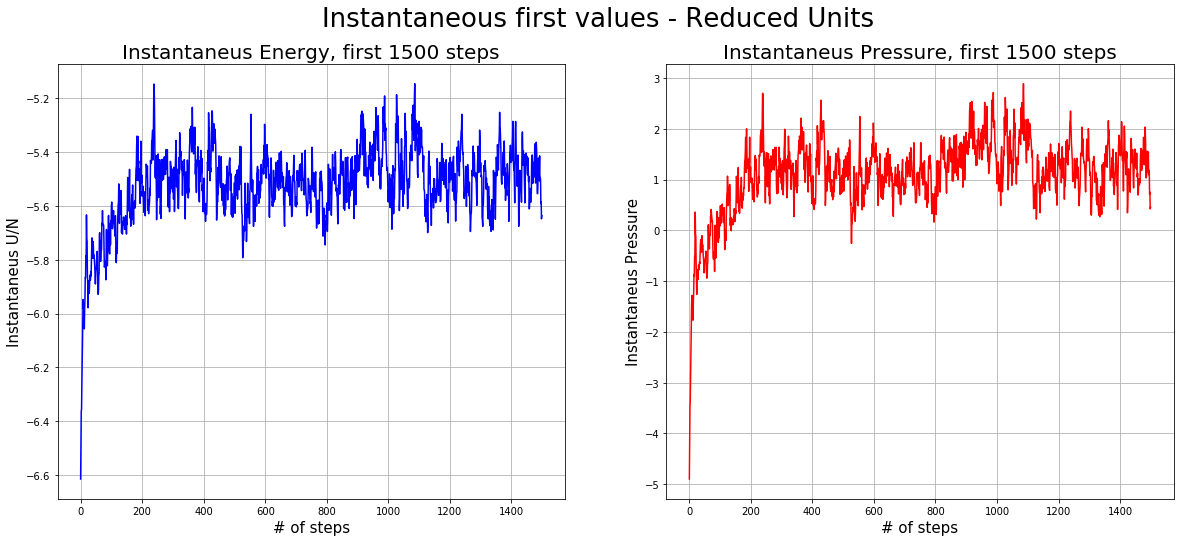

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

x = np.arange(N)

ene = np.loadtxt("liquid/FirstRun/energy.out")
press = np.loadtxt("liquid/FirstRun/pressure.out")

N_short = 1500

ene_short = []
press_short = []
for i in range(N_short):
    ene_short.append(ene[i])
    press_short.append(press[i])
x_short = np.arange(N_short)

fig = plt.figure(figsize=(20,8))
fig.suptitle('Instantaneous first values - Reduced Units',fontsize = 26)

ax1 = fig.add_subplot(121)
ax1.plot(x_short,ene_short,color = 'blue')
ax1.set_title("Instantaneus Energy, first 1500 steps",fontsize = 20)
ax1.set_xlabel("# of steps",fontsize = 15)
ax1.set_ylabel("Instantaneus U/N",fontsize = 15)
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(x_short,press_short,color = 'red')
ax2.set_title("Instantaneus Pressure, first 1500 steps",fontsize = 20)
ax2.set_xlabel("# of steps",fontsize = 15)
ax2.set_ylabel("Instantaneus Pressure",fontsize = 15)
ax2.grid()


plt.show()

### N.B <br> Equilibration seems to be reached in a few hundred steps

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.

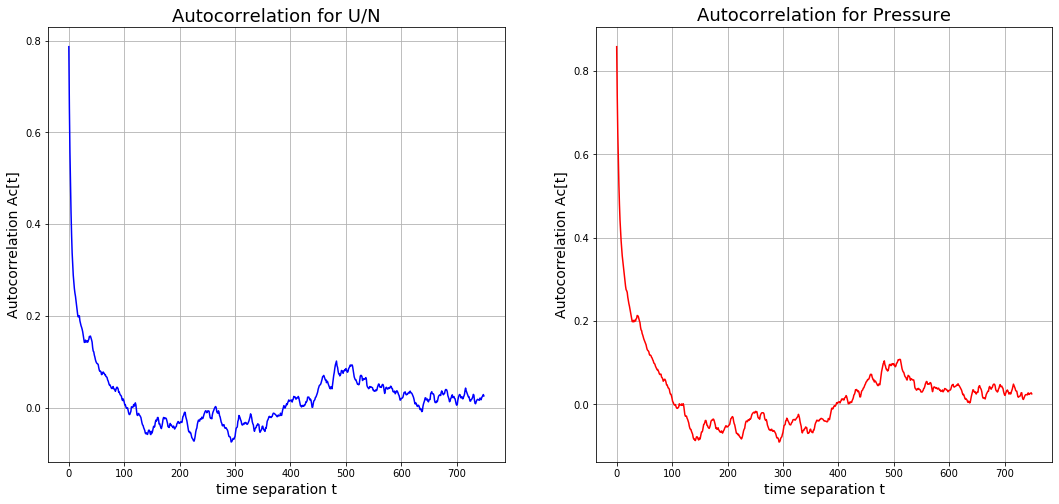

In [11]:
ene = np.loadtxt('liquid/FullRun/energy.out')
press = np.loadtxt('liquid/FullRun/pressure.out')

mean_ene = np.mean(ene)
var_ene = np.var(ene)

mean_press = np.mean(press)
var_press = np.var(press)

x=range(750)

istart = 0  #cut the first steps of equilibration 
covar_ene=[]   
covar_press=[]

for t in range(1,751):
    s1_ene = 0
    s2_ene = 0
    s3_ene = 0
    s1_press = 0
    s2_press = 0
    s3_press = 0
    count = 0
    for i in range(N-istart-750): # -750 avoid surpassing data set length
        s1_ene += ene[istart + i]*ene[istart+i+t] #<x(t)x(t + dt)>
        s2_ene += ene[istart + i]                 #<x(t)>
        s3_ene += ene[istart + i + t]             #<x(t+dt)>
        s1_press += press[istart + i]*press[istart+i+t] 
        s2_press += press[istart + i]                 
        s3_press += press[istart + i + t]
        count +=1
        
    s1_ene/=count
    s2_ene/=count
    s3_ene/=count
    s1_press/=count
    s2_press/=count
    s3_press/=count
    covar_ene.append(((s1_ene-s2_ene*s3_ene)/var_ene))
    covar_press.append(((s1_press-s2_press*s3_press)/var_press))

fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(121)
ax1.plot(x,covar_ene,color = 'blue')
ax1.set_title("Autocorrelation for U/N",fontsize = 18)
ax1.set_xlabel("time separation t",fontsize = 14)
ax1.set_ylabel("Autocorrelation Ac[t]",fontsize = 14)
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(x,covar_press, color = 'red')
ax2.set_title("Autocorrelation for Pressure",fontsize = 18)
ax2.set_xlabel("time separation t",fontsize = 14)
ax2.set_ylabel("Autocorrelation Ac[t]",fontsize = 14)
ax2.grid()

plt.show()

**The autocorrelation function becomes negligible after around 100 steps**

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

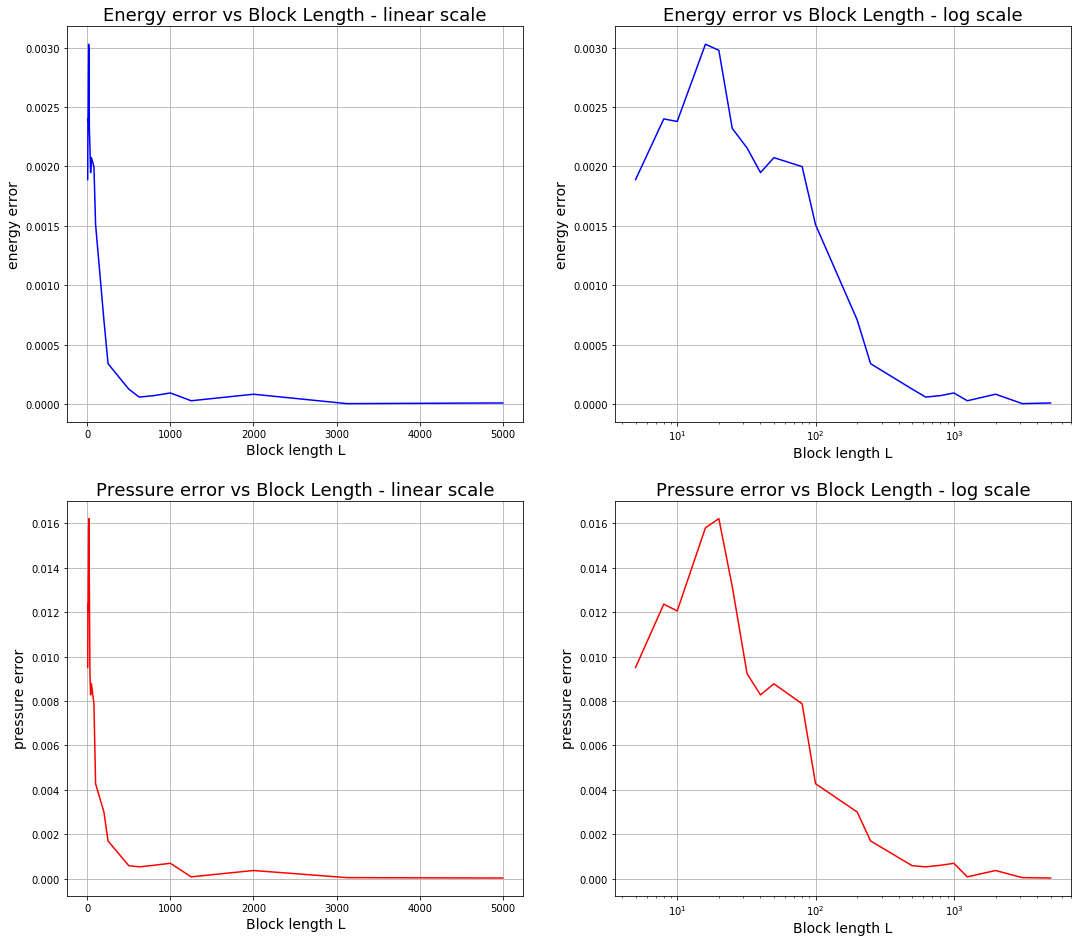

In [12]:
ene = np.loadtxt('liquid/FullRun/energy.out')
press = np.loadtxt('liquid/FullRun/pressure.out')

Lengths=[5,8,10,16,20,25,32,40,50,80,100,200,250,500,625,800,1000,1250,2000,3125,5000]  #some divisors of 5*10^5

Yplot = []

for L in Lengths:
    M= int(N/L)    #number of blocks
    ave=np.zeros(M)
    ave2=np.zeros(M)
    glob_ave=0
    glob_ave2=0
    for iblk in range(M):  #cycle blocks
        for istep in range(L):    #compute average in single block
            ave[iblk]+= ene[iblk+istep]
        ave[iblk]/= L
        ave2[iblk] = ave[iblk]**2
        glob_ave+=ave[iblk]     #build up average of whole sample, given a blk length
        glob_ave2+=ave2[iblk]
    sigma2 = glob_ave2/M - (glob_ave/M)**2
    error = np.sqrt(sigma2 / M)
    
    Yplot.append(error) #build up vector to plot


    
fig = plt.figure(figsize=(18,16))    

ax1 = fig.add_subplot(221)
ax1.plot(Lengths,Yplot, color = 'blue')
ax1.set_title("Energy error vs Block Length - linear scale",fontsize = 18)
ax1.set_xlabel("Block length L",fontsize = 14)
ax1.set_ylabel("energy error",fontsize = 14)
ax1.grid()

ax2 = fig.add_subplot(222)
ax2.plot(Lengths,Yplot, color = 'blue')
ax2.set_title("Energy error vs Block Length - log scale",fontsize = 18)
ax2.set_xlabel("Block length L",fontsize = 14)
ax2.set_xscale("log")
ax2.set_ylabel("energy error",fontsize = 14)
ax2.grid()

Yplot=[]

for L in Lengths:
    M= int(N/L)    #number of blocks
    ave=np.zeros(M)
    ave2=np.zeros(M)
    glob_ave=0
    glob_ave2=0
    for iblk in range(M):  #cycle blocks
        for istep in range(L):    #compute average in single block
            ave[iblk]+= press[iblk+istep]
        ave[iblk]/= L
        ave2[iblk] = ave[iblk]**2
        glob_ave+=ave[iblk]     #build up average of whole sample, given a blk length
        glob_ave2+=ave2[iblk]
    sigma2 = glob_ave2/M - (glob_ave/M)**2
    error = np.sqrt(sigma2 / M)
    
    Yplot.append(error) #build up vector to plot


    
ax3 = fig.add_subplot(223)
ax3.plot(Lengths,Yplot, color = 'red')
ax3.set_title("Pressure error vs Block Length - linear scale",fontsize = 18)
ax3.set_xlabel("Block length L",fontsize = 14)
ax3.set_ylabel("pressure error",fontsize = 14)
ax3.grid()

ax4 = fig.add_subplot(224)
ax4.plot(Lengths,Yplot, color = 'red')
ax4.set_title("Pressure error vs Block Length - log scale",fontsize = 18)
ax4.set_xlabel("Block length L",fontsize = 14)
ax4.set_xscale("log")
ax4.set_ylabel("pressure error",fontsize = 14)
ax4.grid()


plt.show()

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

In [13]:
#g_ave = np.loadtxt('liquid/FullRun/output.gave.0')
#x = np.arange(100)
#g_err = np.loadtxt('liquid/output.gave_err.0')
#
#fig = plt.figure(figsize=(15,8))
#ax_1 = fig.add_subplot(111)
#ax_1.plot(x,g_ave,'bo-.')
#ax_1.set_title('Average g(r) - Liquid', fontsize = 20)
#ax_1.set_xlabel('Distance dr',fontsize = 15)
#ax_1.set_ylabel('g(dr)',fontsize = 15)
#ax_1.grid()
#plt.show()

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

# Solid State

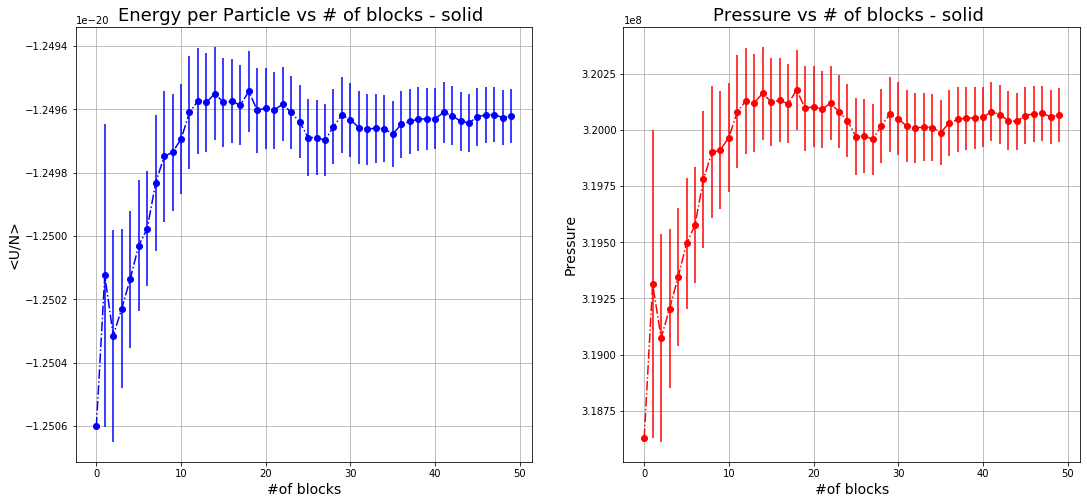

In [14]:
load_ene = np.loadtxt('solid/output.epot.0')
ene = []
err = []
for i in range(len(load_ene)):
    ene.append(load_ene[i][2])
    err.append(load_ene[i][3])
ene = np.asarray(ene)
err = np.asarray(err)

eps_over_Kb = 120 # units for conversion to SI
Kb = 1.38e-23
eps = Kb * eps_over_Kb
sigma = 0.34e-9
eps_over_s3 = eps/sigma**3

x = range(len(load_ene))

fig = plt.figure(figsize = (18,8))

ax_1 = fig.add_subplot(121)
ax_1.errorbar(x,ene*eps,yerr = err*eps,fmt = 'bo-.')
ax_1.grid()
ax_1.set_title("Energy per Particle vs # of blocks - solid ",fontsize = 18)
ax_1.set_xlabel("#of blocks",fontsize = 14)
ax_1.set_ylabel("<U/N>",fontsize = 14)

#################################################
load_press = np.loadtxt('solid/output.pres.0')
press = []
err = []
for i in range(len(load_press)):
    press.append(load_press[i][2])
    err.append(load_press[i][3])
press = np.asarray(press)
err = np.asarray(err)

x = range(len(load_press))

ax_2 = fig.add_subplot(122)
ax_2.errorbar(x,press * eps_over_s3,yerr = err * eps_over_s3,xerr = None,fmt='ro-.')
ax_2.grid()
ax_2.set_title("Pressure vs # of blocks - solid ",fontsize = 18)
ax_2.set_xlabel("#of blocks",fontsize = 14)
ax_2.set_ylabel("Pressure",fontsize = 14)

plt.show()

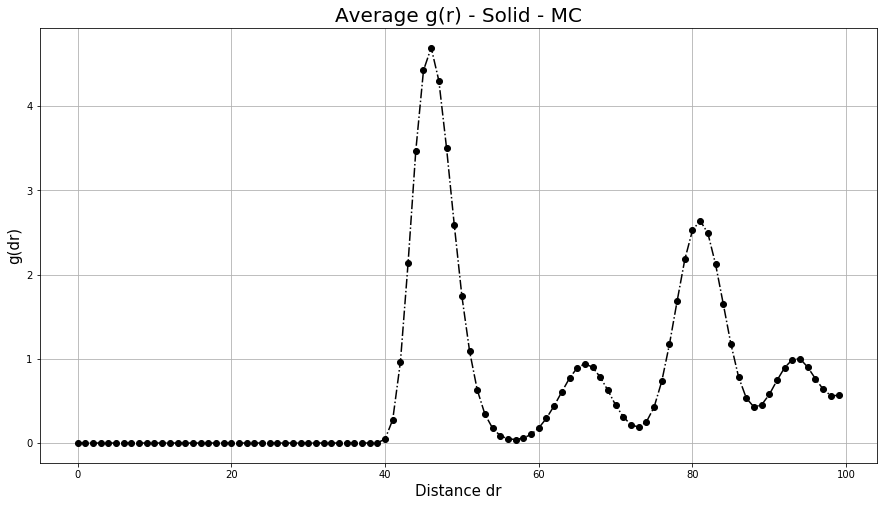

In [15]:
g_ave = np.loadtxt('solid/output.gave.0')
x = np.arange(100)
#g_err = np.loadtxt('liquid/output.gave_err.0')
Npart = 108


fig = plt.figure(figsize=(15,8))
ax_1 = fig.add_subplot(111)
ax_1.plot(x,g_ave/Npart,'ko-.')
ax_1.set_title('Average g(r) - Solid - MC', fontsize = 20)
ax_1.set_xlabel('Distance dr', fontsize = 15)
ax_1.set_ylabel('g(dr)', fontsize = 15)
ax_1.grid()
plt.show()

**The solid state g(r) presents marked peaks and valleys(at g(r)=0), corresponding to the equilibrium positions in the lattice**

# Liquid state

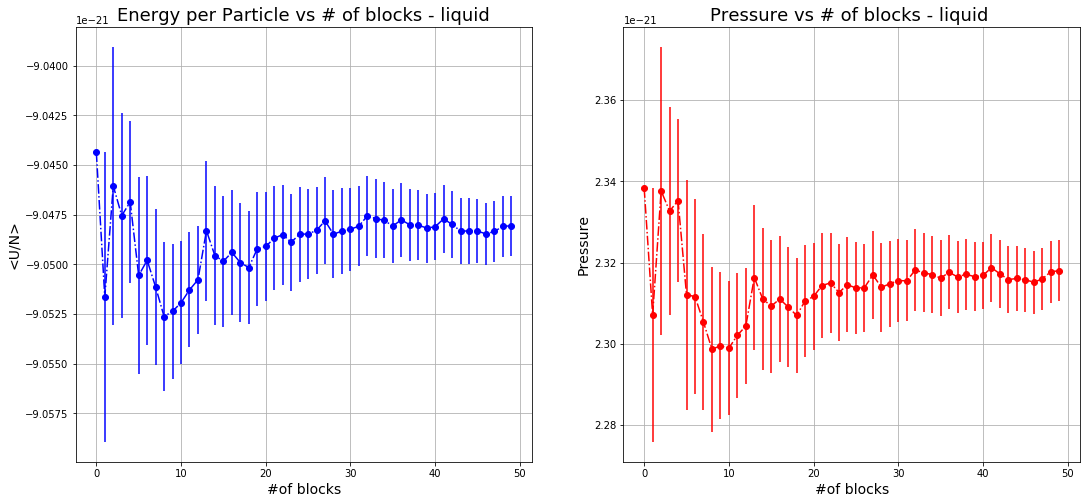

In [16]:
load_ene = np.loadtxt('liquid/output.epot.0')
ene = []
err = []
for i in range(len(load_ene)):
    ene.append(load_ene[i][2])
    err.append(load_ene[i][3])
ene = np.asarray(ene)
err = np.asarray(err)

eps_over_Kb = 120 # units for conversion to SI
Kb = 1.38e-23
eps = Kb * eps_over_Kb
sigma = 0.34e-9
eps_over_s3 = eps/sigma**3

x = range(len(load_ene))

fig = plt.figure(figsize = (18,8))

ax_1 = fig.add_subplot(121)
ax_1.errorbar(x,ene*eps,yerr = err*eps,fmt = 'bo-.')
ax_1.grid()
ax_1.set_title("Energy per Particle vs # of blocks - liquid",fontsize = 18)
ax_1.set_xlabel("#of blocks",fontsize = 14)
ax_1.set_ylabel("<U/N>",fontsize = 14)

#################################################
load_press = np.loadtxt('liquid/output.pres.0')
press = []
err = []
for i in range(len(load_press)):
    press.append(load_press[i][2])
    err.append(load_press[i][3])
press = np.asarray(press)
err = np.asarray(err)

x = range(len(load_press))

ax_2 = fig.add_subplot(122)
ax_2.errorbar(x,press*eps,yerr = err*eps,xerr = None,fmt='ro-.')
ax_2.grid()
ax_2.set_title("Pressure vs # of blocks - liquid ",fontsize = 18)
ax_2.set_xlabel("#of blocks",fontsize = 14)
ax_2.set_ylabel("Pressure",fontsize = 14)

plt.show()

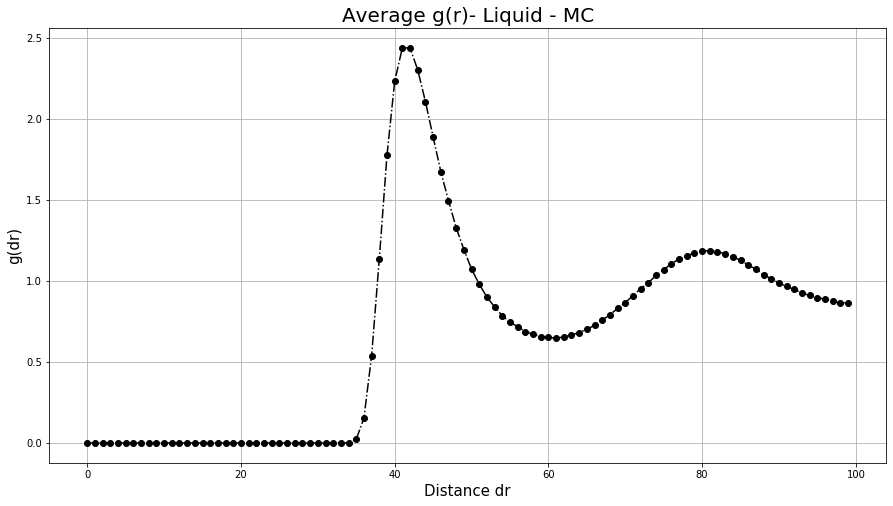

In [17]:
g_ave = np.loadtxt('liquid/output.gave.0')
x = np.arange(100)
#g_err = np.loadtxt('liquid/output.gave_err.0')

Npart = 108

fig = plt.figure(figsize=(15,8))
ax_1 = fig.add_subplot(111)
ax_1.plot(x,g_ave/NPart,'ko-.')
ax_1.set_title('Average g(r)- Liquid - MC',fontsize = 20)
ax_1.set_xlabel('Distance dr', fontsize = 15)
ax_1.set_ylabel('g(dr)', fontsize = 15)
ax_1.grid()
plt.show()

**Liquid state g(r) again presents favored equilibrium positions, but the valleys are less pronounced, because particles are more free to move away from equilibrium**

# Gas State

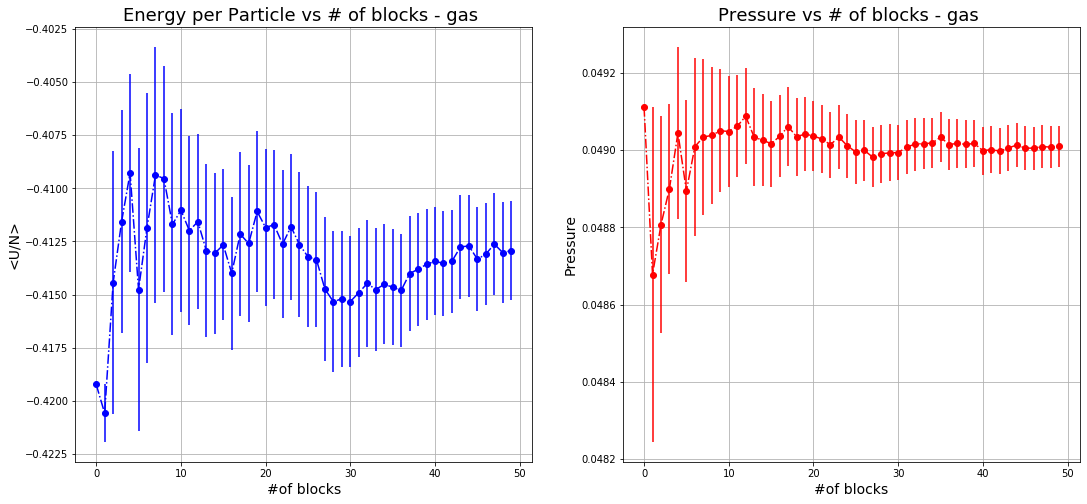

In [18]:
load_ene = np.loadtxt('gas/output.epot.0')
ene = []
err = []
for i in range(len(load_ene)):
    ene.append(load_ene[i][2])
    err.append(load_ene[i][3])
ene = np.asarray(ene)
err = np.asarray(err)

x = range(len(load_ene))

eps_over_Kb = 120 # units for conversion to SI
Kb = 1.38e-23
eps = Kb * eps_over_Kb
sigma = 0.34e-9
eps_over_s3 = eps/sigma**3


fig = plt.figure(figsize = (18,8))

ax_1 = fig.add_subplot(121)
ax_1.errorbar(x,ene,yerr = err,fmt = 'bo-.')
ax_1.grid()
ax_1.set_title("Energy per Particle vs # of blocks - gas ", fontsize = 18)
ax_1.set_xlabel("#of blocks", fontsize = 14)
ax_1.set_ylabel("<U/N>", fontsize = 14)

#################################################
load_press = np.loadtxt('gas/output.pres.0')
press = []
err = []
for i in range(len(load_press)):
    press.append(load_press[i][2])
    err.append(load_press[i][3])
press = np.asarray(press)
err = np.asarray(err)

x = range(len(load_press))

ax_2 = fig.add_subplot(122)
ax_2.errorbar(x,press,yerr = err,xerr = None,fmt='ro-.')
ax_2.grid()
ax_2.set_title("Pressure vs # of blocks - gas ", fontsize = 18)
ax_2.set_xlabel("#of blocks", fontsize = 14)
ax_2.set_ylabel("Pressure", fontsize = 14)

plt.show()

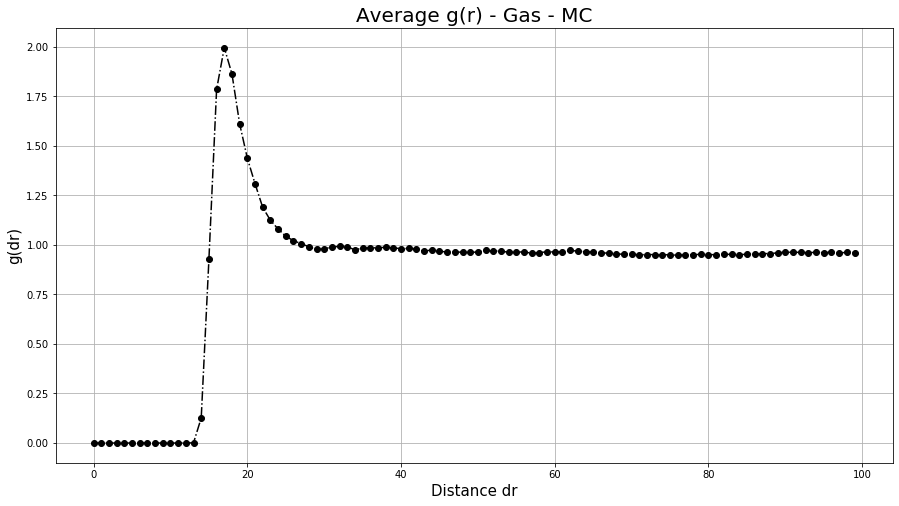

In [19]:
g_ave = np.loadtxt('gas/output.gave.0')
x = np.arange(100)
#g_err = np.loadtxt('liquid/output.gave_err.0')

NPart = 108

fig = plt.figure(figsize=(15,8))
ax_1 = fig.add_subplot(111)
ax_1.plot(x,g_ave/NPart,'ko-.')
ax_1.set_title('Average g(r) - Gas - MC', fontsize = 20)
ax_1.set_xlabel('Distance dr', fontsize = 15)
ax_1.set_ylabel('g(dr)', fontsize = 15)
ax_1.grid()
plt.show()

**Gas state g(r) presents a single peak, indicating correlation between close particles, but particles more distant than $r\approx 30$ are uncorrelated, therefore making the distribution undistinguishable from a random uniform one.**